
# Logistic Regression for Weather Prediction

This notebook demonstrates the use of **Logistic Regression** to predict rainfall using weather data. 
We will perform data preprocessing, feature selection, model training, and evaluation.

## Dataset Overview
The dataset contains weather observations from multiple locations in Australia. The target variable is `RainTomorrow`, which indicates whether it rained the next day.

---



## Data Loading and Exploration

We start by downloading the dataset and inspecting its structure. The dataset is fetched from Kaggle and loaded into a Pandas DataFrame.


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jsphyg/weather-dataset-rattle-package")

print("Path to dataset files:", path)

In [3]:
import pandas as pd

df = pd.read_csv(path + "/weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No



## Data Cleaning

Since missing values can impact model performance, we handle them by removing rows where the target variable (`RainTomorrow`) is missing. Other missing values are handled appropriately.


In [ ]:
df.info()

In [4]:
df.dropna(subset=["RainTomorrow",'RainToday'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null   fl

In [5]:
!pip install plotly matplotlib seaborn


## Exploratory Data Analysis (EDA)

To understand our dataset, we visualize important features. This step helps in identifying patterns, correlations, and potential issues with data.


In [6]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
fig = px.histogram(df, x="Location", color="RainTomorrow",title='no of rain days in each location')
fig.update_layout(bargap=0.2)
fig.show()


In [8]:
fig = px.histogram(df,x='Temp3pm',color='RainTomorrow',title='Temp3pm')
fig.show()

<Axes: xlabel='Date', ylabel='count'>

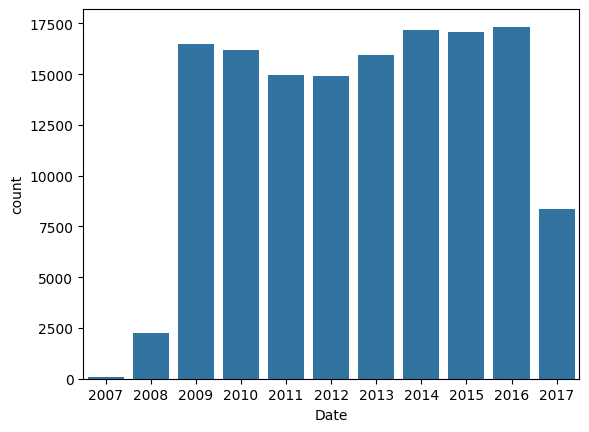

In [9]:
sns.countplot(x = pd.to_datetime(df['Date']).dt.year)

In [10]:
year = pd.to_datetime(df['Date']).dt.year
train_df = df[year < 2015]
val_df = df[year == 2015]
test_df = df[year > 2015]


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97988 entries, 0 to 144552
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           97988 non-null  object 
 1   Location       97988 non-null  object 
 2   MinTemp        97674 non-null  float64
 3   MaxTemp        97801 non-null  float64
 4   Rainfall       97988 non-null  float64
 5   Evaporation    61657 non-null  float64
 6   Sunshine       57942 non-null  float64
 7   WindGustDir    91120 non-null  object 
 8   WindGustSpeed  91160 non-null  float64
 9   WindDir9am     90969 non-null  object 
 10  WindDir3pm     96036 non-null  object 
 11  WindSpeed9am   97114 non-null  float64
 12  WindSpeed3pm   96919 non-null  float64
 13  Humidity9am    96936 non-null  float64
 14  Humidity3pm    96872 non-null  float64
 15  Pressure9am    88876 non-null  float64
 16  Pressure3pm    88857 non-null  float64
 17  Cloud9am       63000 non-null  float64
 18  Cloud3pm  

In [ ]:
val_df.info()

In [ ]:
test_df.info()

In [12]:
input_cols = train_df.columns[1:-1]
target_cols = train_df.columns[-1]

In [13]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_cols].copy()
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_cols].copy()
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_cols].copy()

In [14]:
numeric_cols = train_inputs.select_dtypes(include='number').columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()
categorical_cols, numeric_cols

(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'],
 ['MinTemp',
  'MaxTemp',
  'Rainfall',
  'Evaporation',
  'Sunshine',
  'WindGustSpeed',
  'WindSpeed9am',
  'WindSpeed3pm',
  'Humidity9am',
  'Humidity3pm',
  'Pressure9am',
  'Pressure3pm',
  'Cloud9am',
  'Cloud3pm',
  'Temp9am',
  'Temp3pm'])

In [15]:
df[numeric_cols].isna().sum()

,0
MinTemp,468
MaxTemp,307
Rainfall,0
Evaporation,59694
Sunshine,66805
WindGustSpeed,9105
WindSpeed9am,1055
WindSpeed3pm,2531
Humidity9am,1517
Humidity3pm,3501


In [16]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

In [17]:
imputer.fit(df[numeric_cols])

SimpleImputer()

In [18]:
imputer.statistics_

array([  12.18482387,   23.2351203 ,    2.34997407,    5.47251551,
          7.63053986,   39.97051989,   13.99049609,   18.63114078,
         68.82683277,   51.44928835, 1017.65457715, 1015.25796259,
          4.43116082,    4.49925023,   16.98706639,   21.69318269])

In [19]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [20]:
train_inputs[numeric_cols].isna().sum()

,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustSpeed,0
WindSpeed9am,0
WindSpeed3pm,0
Humidity9am,0
Humidity3pm,0


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[numeric_cols])

MinMaxScaler()

In [22]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [23]:
train_inputs.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000
mean,0.483689,0.525947,0.006396,0.036949,0.525366,0.265107,0.108395,0.215668,0.686309,0.514693,0.612014,0.608705,0.483192,0.493693,0.507089,0.517103
std,0.149458,0.131904,0.022962,0.021628,0.200931,0.102420,0.068800,0.101424,0.189008,0.206376,0.111335,0.106611,0.255486,0.238028,0.134722,0.130726
min,0.000000,0.013233,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030400,0.000000,0.000000,0.027426,0.005758
25%,0.377358,0.429112,0.000000,0.026207,0.517241,0.193798,0.053846,0.149425,0.570000,0.370000,0.543802,0.540800,0.333333,0.333333,0.409283,0.422265
50%,0.478774,0.514178,0.000000,0.037741,0.526244,0.255814,0.100000,0.218391,0.690000,0.520000,0.614125,0.610527,0.492351,0.499917,0.502110,0.506718
75%,0.591981,0.618147,0.002156,0.038621,0.634483,0.310078,0.146154,0.275862,0.830000,0.650000,0.682645,0.675200,0.666667,0.666667,0.601266,0.604607
max,1.000000,1.000000,1.000000,0.568276,0.986207,1.000000,0.669231,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988484


In [24]:
df[categorical_cols].nunique()

,0
Location,49
WindGustDir,16
WindDir9am,16
WindDir3pm,16
RainToday,2


In [25]:
df[categorical_cols]

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,Albury,W,W,WNW,No
1,Albury,WNW,NNW,WSW,No
2,Albury,WSW,W,WSW,No
3,Albury,NE,SE,E,No
4,Albury,W,ENE,NW,No
...,...,...,...,...,...
145454,Uluru,E,ESE,E,No
145455,Uluru,E,SE,ENE,No
145456,Uluru,NNW,SE,N,No
145457,Uluru,N,SE,WNW,No


In [26]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [27]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 ar

In [28]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [29]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

<ipython-input-29-8950d7c1751d>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-29-8950d7c1751d>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-29-8950d7c1751d>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-29-8950d7c1751d>:1: PerformanceWarning:

Da

In [30]:
train_inputs.shape,test_inputs.shape,val_inputs.shape

((97988, 123), (25710, 123), (17089, 123))

In [31]:
!pip install pyarrow

In [32]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')


In [33]:
train_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes
0,Albury,0.516509,0.523629,0.001617,0.037741,0.526244,W,0.294574,W,WNW,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,Albury,0.375000,0.565217,0.000000,0.037741,0.526244,WNW,0.294574,NNW,WSW,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,Albury,0.504717,0.576560,0.000000,0.037741,0.526244,WSW,0.310078,W,WSW,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,Albury,0.417453,0.620038,0.000000,0.037741,0.526244,NE,0.139535,SE,E,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Albury,0.613208,0.701323,0.002695,0.037741,0.526244,W,0.271318,ENE,NW,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,Uluru,0.599057,0.718336,0.000000,0.037741,0.526244,SSE,0.286822,ESE,SSE,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
144549,Uluru,0.556604,0.786389,0.000000,0.037741,0.526244,NE,0.193798,ENE,SW,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
144550,Uluru,0.608491,0.805293,0.000000,0.037741,0.526244,ESE,0.255814,ESE,SSE,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
144551,Uluru,0.674528,0.818526,0.000000,0.037741,0.526244,ESE,0.286822,ESE,SSW,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [34]:
from sklearn.linear_model import LogisticRegression

In [36]:
model = LogisticRegression(solver='liblinear')
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

LogisticRegression(solver='liblinear')

In [38]:
a = pd.DataFrame({
    'features': numeric_cols + encoded_cols,
    'coefficients': model.coef_.tolist()[0]
})
a.sort_values('coefficients', ascending=False)

,features,coefficients
5,WindGustSpeed,6.764402
9,Humidity3pm,5.995310
10,Pressure9am,5.463842
2,Rainfall,3.162778
15,Temp3pm,2.021436
...,...,...
7,WindSpeed3pm,-1.428433
116,RainToday_No,-1.473521
4,Sunshine,-1.671397
1,MaxTemp,-2.879929


In [39]:
model.intercept_

array([-2.44956109])

In [40]:
x_train = train_inputs[numeric_cols + encoded_cols]
x_val = val_inputs[numeric_cols + encoded_cols]
x_test = test_inputs[numeric_cols + encoded_cols]


In [41]:
train_preds = model.predict(x_train)

In [42]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [43]:
train_targets

,RainTomorrow
0,No
1,No
2,No
3,No
4,No
...,...
144548,No
144549,No
144550,No
144551,No


In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(train_targets, train_preds)

0.8519206433440829

In [48]:
train_preds_proba = model.predict_proba(x_train)
train_preds_proba

array([[0.94401311, 0.05598689],
       [0.94074304, 0.05925696],
       [0.96093735, 0.03906265],
       ...,
       [0.98749147, 0.01250853],
       [0.98334725, 0.01665275],
       [0.87453712, 0.12546288]])

In [49]:
model.classes_

array(['No', 'Yes'], dtype=object)

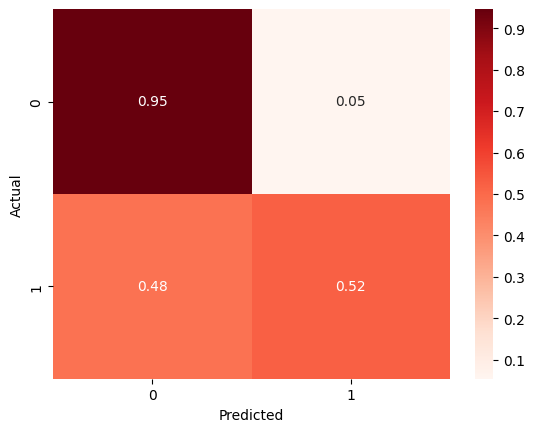

In [54]:
from sklearn.metrics import confusion_matrix
x = confusion_matrix(train_targets, train_preds,normalize='true')
plt.figure()
sns.heatmap(x, annot=True, fmt='.2f', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

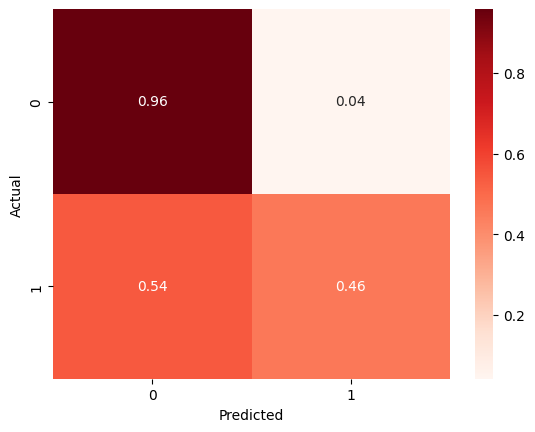

Accuracy:  0.8539996488969512


In [59]:
val_preds = model.predict(x_val)
x = confusion_matrix(val_targets, val_preds,normalize='true')
plt.figure()
sns.heatmap(x, annot=True, fmt='.2f', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('Accuracy: ',accuracy_score(val_targets, val_preds))

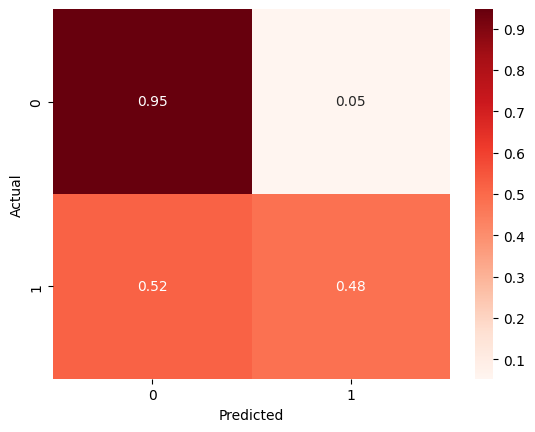

Accuracy:  0.8420070011668611


In [60]:
test_preds = model.predict(x_test)
x = confusion_matrix(test_targets, test_preds,normalize='true')
plt.figure()
sns.heatmap(x, annot=True, fmt='.2f', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('Accuracy: ',accuracy_score(test_targets, test_preds))

In [62]:
import numpy as np
accuracy_score(test_targets, np.random.choice(['No', 'Yes'], len(test_targets)))

0.4957604045118631

In [63]:
accuracy_score(train_targets, ['No']*len(train_targets))

0.7775441890843777

In [64]:
import joblib

In [65]:
aussie_rain_model = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_cols': target_cols,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols

}

In [66]:
joblib.dump(aussie_rain_model, 'aussie_rain_model.joblib')

['aussie_rain_model.joblib']

In [67]:
aussie_rain_model2 = joblib.load('aussie_rain_model.joblib')

In [68]:
aussie_rain_model2['model'].coef_

array([[ 8.98632415e-01, -2.87992885e+00,  3.16277839e+00,
         8.54233199e-01, -1.67139676e+00,  6.76440200e+00,
        -9.42319392e-01, -1.42843320e+00,  3.22887060e-01,
         5.99530962e+00,  5.46384216e+00, -9.17680277e+00,
        -1.62301186e-01,  1.28765759e+00,  4.74707139e-01,
         2.02143609e+00,  6.01650316e-01, -5.52481608e-01,
         4.78143773e-01,  7.66526805e-03,  3.46814516e-01,
        -3.52278173e-01,  1.79711400e-01,  4.40487782e-01,
        -1.39811470e-02,  2.89454220e-02,  2.58149549e-01,
        -2.12046255e-02, -4.27965071e-02, -4.83142125e-01,
        -1.37561991e-01, -5.76060346e-01, -7.87526710e-01,
        -2.55404319e-01, -3.28885577e-01, -5.69006169e-01,
         8.18301255e-02,  1.33788542e-02,  6.41273900e-02,
        -9.02055123e-01, -4.44329235e-01,  8.52270704e-03,
        -4.60614214e-01, -4.65518694e-01, -6.95005341e-02,
         1.91160445e-01,  4.50476536e-01,  6.08120260e-01,
         4.27312767e-01, -2.83317484e-02,  2.51547821e-0